<center>
    
<h2>BÀI TẬP MÔN HỌC </h2>
    
</center>
 
---
**Thông tin sinh viên:**
1. Họ tên SV: Phạm Anh Tuấn
2. Mã Sinh viên: 2121050107
3. Lớp: DCCTKH66
4. Nhóm môn học:


---

**Mô tả tập dữ liệu:**

Tập dữ liệu Data_Practice_ML.xlsx chứa dữ liệu của các bệnh nhân bị u vú. (chi tiết trong slide bài giảng)

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 8 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Sex: Thuộc tính cho biết giới tính bệnh nhân
3. Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số
4. Weight: Thuộc tính cho biết cân nặng của bệnh nhân (Kg)
5. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
6. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
7. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
8. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)
 

## PHẦN I: CHUẨN BỊ DỮ LIỆU
---

**Yêu cầu 1:**
Đọc tập dữ liệu Data_Practice_ML.xlsx vào biến DataFrame,
- Hiển thị thông tin của biến,
- Hiển thị dữ liệu 5 bản ghi đầu tiên; 5 bản ghi cuối cùng, 5 bản ghi ngẫu nhiên
- Thống kê dữ liệu các thuộc tính số, các thuộc tính Object; đưa ra các nhận xét về dữ liệu; Có thể sử dụng các biểu đồ để thể hiện trực quan

In [19]:
import pandas as pd
import numpy as np


df_practice = pd.read_excel("Data\Data_Practice_ML.xlsx")

print("Hiển thị thông tin biến")
df_practice.info() #hien thi thong tin bien

Hiển thị thông tin biến
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Sex        961 non-null    object 
 2   Age        956 non-null    float64
 3   Weight     961 non-null    int64  
 4   Shape      930 non-null    object 
 5   Margin     913 non-null    object 
 6   Density    885 non-null    object 
 7   Target     961 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 60.2+ KB


In [20]:
print("Hiển thị 5 bản ghi đầu tiên")

df_practice.head(5)

Hiển thị 5 bản ghi đầu tiên


,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,P1,Female,67.0,46,Lobular,Spiculated,Low,1
1,P2,Female,43.0,66,Round,Circumscribed,NaN,1
2,P3,Female,58.0,80,Irregular,Spiculated,Low,1
3,P4,Female,28.0,51,Round,Circumscribed,Low,0
4,P5,Female,74.0,46,Round,Spiculated,NaN,1


In [21]:
print("HIển thị 5 bản ghi cuối")

df_practice.tail(5)

HIển thị 5 bản ghi cuối


,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
956,P957,Female,47.0,72,Oval,Circumscribed,Low,0
957,P958,Female,56.0,64,Irregular,Spiculated,Low,1
958,P959,Female,64.0,75,Irregular,Spiculated,Low,0
959,P960,Female,66.0,56,Irregular,Spiculated,Low,1
960,P961,Female,62.0,51,Lobular,Obscured,Low,0


In [22]:
print("Hiển thị 5 bản ghi ngẫu nhiên")

df_practice.sample(5)

Hiển thị 5 bản ghi ngẫu nhiên


,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
289,P290,Female,53.0,51,Lobular,ill-defined,Fat-containing,0
214,P215,Female,76.0,56,Irregular,Spiculated,Low,1
346,P347,Female,61.0,47,Irregular,Circumscribed,Low,0
744,P745,Female,25.0,63,Oval,Circumscribed,Low,0
822,P823,Female,48.0,71,Round,Circumscribed,Low,0


In [23]:
print("Thống kê dữ liệu các thuộc tính số")

df_practice.describe()

Thống kê dữ liệu các thuộc tính số


,Age,Weight,Target
count,956.000000,961.000000,961.000000
mean,56.306485,62.609781,0.463059
std,30.044212,10.440240,0.498893
min,18.000000,45.000000,0.000000
25%,45.000000,53.000000,0.000000
50%,57.000000,62.000000,0.000000
75%,66.000000,71.000000,1.000000
max,870.000000,80.000000,1.000000


In [24]:
print("Thống kê các thuộc tính Object") #Object Kiểu dữ liệu chuỗi
df_practice.describe(include="O")

Thống kê các thuộc tính Object


,PatientID,Sex,Shape,Margin,Density
count,961,961,930,913,885
unique,961,2,5,6,5
top,P1,Female,Irregular,Circumscribed,Low
freq,1,960,399,357,797


In [25]:
print("Nhận xét về dữ liệu")
print("Những nhóm người có thể mắc bệnh u vú")
print("__________")

print("Giới tính")
print(df_practice["Sex"].value_counts())
print("Nhận xét: Giới tính có nguy cơ mắc u vú cao nhất là ", df_practice["Sex"].value_counts().idxmax())

print("__________")
print("Độ tuổi")
print(df_practice["Age"].value_counts())
print("Nhận xét: Độ tuổi có nguy cơ mắc u vú cao nhất là ",df_practice["Age"].value_counts().idxmax(), "tuổi")

error_age = 870
df_practice["Age"] = df_practice["Age"].replace(error_age,float('nan'))
# Trong Age có giá trị tuổi = 870, thay thế bằng NaN

print("__________")
print("Cân nặng")
print(df_practice["Weight"].value_counts())
print("Nhận xét: Cân nặng có nguy cơ mắc u vú cao nhất là ",df_practice["Weight"].value_counts().idxmax(), "kg")




Nhận xét về dữ liệu
Những nhóm người có thể mắc bệnh u vú
__________
Giới tính
Female    960
FEMALE      1
Name: Sex, dtype: int64
Nhận xét: Giới tính có nguy cơ mắc u vú cao nhất là  Female
__________
Độ tuổi
59.0     36
67.0     32
57.0     32
66.0     31
46.0     28
         ..
870.0     1
82.0      1
18.0      1
88.0      1
20.0      1
Name: Age, Length: 74, dtype: int64
Nhận xét: Độ tuổi có nguy cơ mắc u vú cao nhất là  59.0 tuổi
__________
Cân nặng
49    40
80    38
69    36
61    36
57    35
51    34
70    33
53    32
50    31
65    31
68    30
46    30
78    28
58    28
77    28
75    26
73    26
63    26
79    26
48    26
56    25
74    25
59    25
62    25
54    25
72    22
66    22
60    21
67    21
76    21
64    20
52    19
47    18
71    18
55    17
45    17
Name: Weight, dtype: int64
Nhận xét: Cân nặng có nguy cơ mắc u vú cao nhất là  49 kg


59.0    36
67.0    32
57.0    32
66.0    31
46.0    28
        ..
18.0     1
82.0     1
93.0     1
96.0     1
20.0     1
Name: Age, Length: 73, dtype: int64


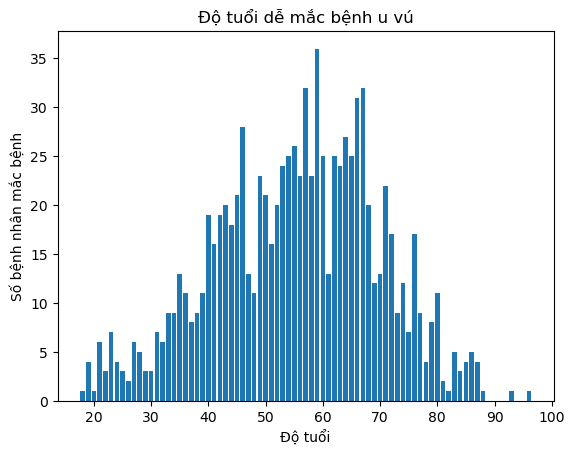

In [26]:
#Biểu đồ trực quan hóa độ tuổi dễ mắc bệnh
import matplotlib.pyplot as plt

age = df_practice['Age'].value_counts()
print(age)


plt.bar(age.index, age.values)

plt.title("Độ tuổi dễ mắc bệnh u vú")
plt.xlabel("Độ tuổi")
plt.ylabel("Số bệnh nhân mắc bệnh")

plt.show()


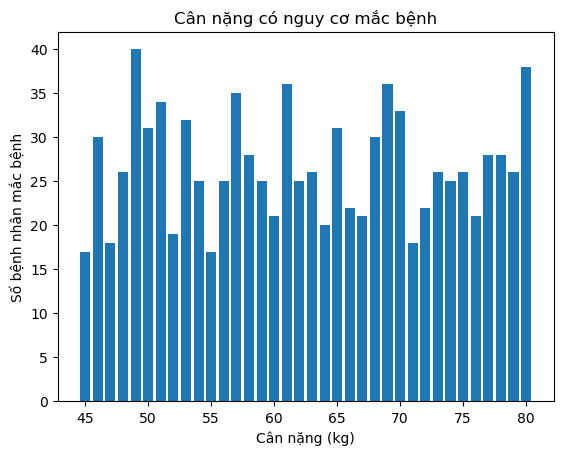

In [27]:
weight = df_practice["Weight"].value_counts()

plt.bar(weight.index, weight.values)

plt.xlabel("Cân nặng (kg)")
plt.ylabel("Số bệnh nhân mắc bệnh")
plt.title("Cân nặng có nguy cơ mắc bệnh")

plt.show()

**Yêu cầu 2:**

- Kiểm tra các bản ghi trùng lặp, các thông số bất thường trong tập dữ liệu nếu có
- Thống kê dữ liệu thiếu (missing) cho từng thuộc tính, và liệt kê ra các bản ghi bị missing tương ứng với thuộc tính đó.

In [28]:
#Hiển thị bản ghi trùng lặp
print(df_practice[(df_practice.duplicated()==True)])
print("_________________")
#Kiểm tra dữ liệu thiếu(missing)

missing_counts = df_practice.isna().sum()
print("Số lượng giá trị thiếu cho từng thuộc tính: ")
print(missing_counts)
print("__________")

# Liệt kê các bản ghi bị thiếu tương ứng với từng thuộc tính
for column in df_practice.columns:
    missing_records = df_practice[df_practice[column].isnull()]
    if not missing_records.empty:
        print(f"Các bản ghi bị thiếu cho thuộc tính '{column}':")
        print(missing_records)




Empty DataFrame
Columns: [PatientID, Sex, Age, Weight, Shape, Margin, Density, Target]
Index: []
_________________
Số lượng giá trị thiếu cho từng thuộc tính: 
PatientID     0
Sex           0
Age           6
Weight        0
Shape        31
Margin       48
Density      76
Target        0
dtype: int64
__________
Các bản ghi bị thiếu cho thuộc tính 'Age':
    PatientID     Sex  Age  Weight      Shape       Margin Density  Target
165      P166  Female  NaN      73  Irregular   Spiculated     Low       1
443      P444  Female  NaN      48  Irregular   Spiculated     Low       1
453      P454  Female  NaN      64  Irregular  ill-defined     Low       1
683      P684  Female  NaN      53    Lobular     Obscured     Low       1
884      P885  Female  NaN      75  Irregular  ill-defined     Low       1
923      P924  Female  NaN      51  Irregular     Obscured     Low       1
Các bản ghi bị thiếu cho thuộc tính 'Shape':
    PatientID     Sex   Age  Weight Shape         Margin         Density  \

**Yêu cầu 3:** 

- Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target]
- Xác định thuộc tính quan trọng, không quan trọng ảnh hưởng việc u lành tính hay ác tính của bệnh nhân

0    516
1    445
Name: Target, dtype: int64


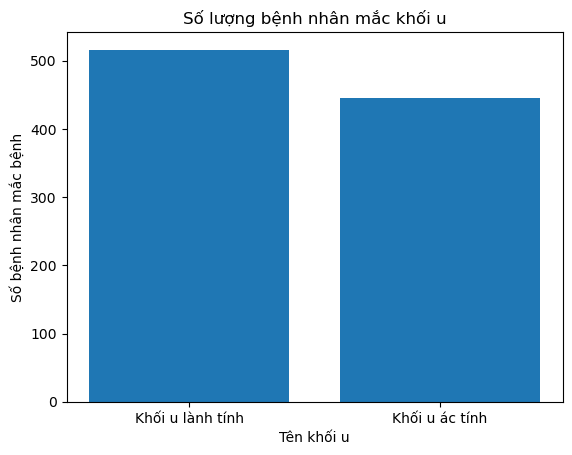

In [29]:
#Target thuộc tính cho biết khối u lành tính (0) hay u ác tính (1)

#Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số
#Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
#Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
#Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing

print(df_practice["Target"].value_counts())

target = df_practice["Target"].value_counts()

name = ["Khối u lành tính", "Khối u ác tính"]

plt.bar(name, target.values)

plt.xlabel("Tên khối u")
plt.ylabel("Số bệnh nhân mắc bệnh")
plt.title("Số lượng bệnh nhân mắc khối u")
plt.show()



        count       mean        std   min    25%   50%    75%   max
Target                                                             
0       516.0  49.713178  13.636441  18.0  40.75  50.0  59.25  86.0
1       439.0  62.202733  12.319839  28.0  54.00  63.0  71.00  96.0


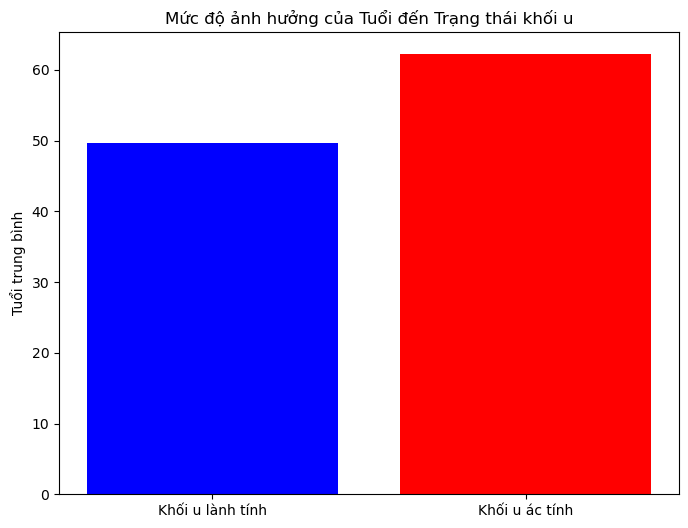

In [30]:
# Dữ liệu theo 'Target và tính toán số liệu thống kê tóm tắt cho 'Age'
age_target_summary = df_practice.groupby('Target')['Age'].describe()
print(age_target_summary)

#Count: Số bệnh nhân mắc u 
#Độ tuổi trung bình
#Đô lệch chuẩn
#25%
#50%
#75%
#Max: Độ tuổi tối đa mắc u

targets = ['Khối u lành tính', 'Khối u ác tính']
mean_age = [49.71, 62.20]  # Giá trị trung bình của Age cho mỗi nhóm Target

plt.figure(figsize=(8, 6)) #dài / rộng của biểu đồ

plt.bar(targets, mean_age, color=['blue', 'red'])
plt.ylabel('Tuổi trung bình')
plt.title('Mức độ ảnh hưởng của Tuổi đến Trạng thái khối u')

plt.show()


# Nhận xét: Độ tuổi có ảnh hưởng lớn đến sự xuất hiện của U lành tính hay U ác tính

       count unique        top freq
Target                             
0        496      4      Round  186
1        433      4  Irregular  315


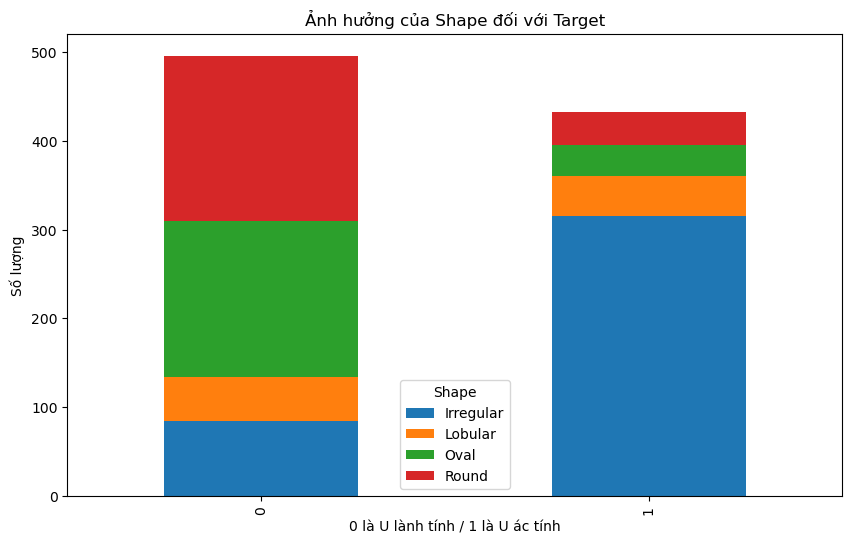

In [34]:
#Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular

# Tạo DataFrame chứa số lượng mẫu cho mỗi nhóm Target và Shape
shape_target_summary = df_practice.groupby('Target')['Shape'].describe()
print(shape_target_summary)

#Xóa dữ liệu bị sai trong cột Shape
df_practice = df_practice[df_practice['Shape'] != 'IRREGULAR']




target_shape_counts = df_practice.groupby(['Target', 'Shape']).size().unstack(fill_value=0)

#groupby() Lấy dữ liệu từ 2 thuộc tính
#unstack chuyển dữ liệu từ chuỗi sang bảng 
#fill_value thay thế giá trị thiếu = 0


target_shape_counts.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.title('Ảnh hưởng của Shape đối với Target')
plt.xlabel('0 là U lành tính / 1 là U ác tính')
plt.ylabel('Số lượng')


plt.legend(title='Shape')

# Hiển thị biểu đồ
plt.show()




# Nhận xét: Hình dạng u không ảnh hưởng nhiều đến việc U là lành hay dữ tính

**Yêu cầu 4:** 
- Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các mô hình học máy
- Lưu kết quả dữ liệu sau xử lý ra file Data_Practice_ML_OK.csv

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}






